# Download Data

In [261]:
import os

directory = r"C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data"

# Check if the directory already exists
if not os.path.exists(directory):
    try:
        # Create the directory if it doesn't exist
        os.makedirs(directory)
        print(f"Created directory: {directory}")
    except OSError as e:
        # Handle any error that occurs while creating the directory
        print(f"Failed to create directory: {directory}")
        print(f"Error: {str(e)}")
else:
    print(f"Directory already exists: {directory}")

Directory already exists: C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data


In [262]:
import os

directory = r'C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data'

# List the files and directories within the 'data' directory
contents = os.listdir(directory)

for item in contents:
    item_path = os.path.join(directory, item)
    if os.path.isdir(item_path):
        print(f"Directory: {item}")
    else:
        print(f"File: {item}")

import os
import urllib.request
import shutil

local_path = r"C:\Users\BROOKLYNBOSS\Desktop\PROJECT"
destination_dir = r"C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data"

# Ensure destination directory exists
os.makedirs(destination_dir, exist_ok=True)

source_files = [
    os.path.join(local_path, "20030228_easy_ham.tar.bz2"),
    os.path.join(local_path, "20030228_easy_ham_2.tar.bz2"),
    os.path.join(local_path, "20030228_hard_ham.tar.bz2"),
    os.path.join(local_path, "20030228_spam.tar.bz2"),
    os.path.join(local_path, "20050311_spam_2.tar.bz2")
]

# Counter for successfully copied files
success_count = 0

# Copy files from the local directory or download from the web
for source_file in source_files:
    filename = os.path.basename(source_file)
    local_file_path = os.path.join(local_path, filename)
    destination_file_path = os.path.join(destination_dir, filename)

    if os.path.exists(local_file_path):
        print(f"File '{filename}' found in the local directory. Copying...")
        shutil.copy(local_file_path, destination_file_path)
        print(f"File '{filename}' copied to the destination directory.")
        success_count += 1
    else:
        print(f"File '{filename}' not found in the local directory. Downloading...")
        url = f"https://spamassassin.apache.org/old/publiccorpus/{filename}"
        urllib.request.urlretrieve(url, destination_file_path)
        print(f"File '{filename}' downloaded successfully.")
        success_count += 1

print(f"{success_count} files were successfully copied.")


Directory: spam data
File '20030228_easy_ham.tar.bz2' found in the local directory. Copying...
File '20030228_easy_ham.tar.bz2' copied to the destination directory.
File '20030228_easy_ham_2.tar.bz2' found in the local directory. Copying...
File '20030228_easy_ham_2.tar.bz2' copied to the destination directory.
File '20030228_hard_ham.tar.bz2' found in the local directory. Copying...
File '20030228_hard_ham.tar.bz2' copied to the destination directory.
File '20030228_spam.tar.bz2' found in the local directory. Copying...
File '20030228_spam.tar.bz2' copied to the destination directory.
File '20050311_spam_2.tar.bz2' found in the local directory. Copying...
File '20050311_spam_2.tar.bz2' copied to the destination directory.
5 files were successfully copied.


In [263]:
# file extraction
import os
import tarfile

directory = r"C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data"
archive_files = [
    "20030228_easy_ham_2.tar.bz2",
    "20030228_easy_ham.tar.bz2",
    "20030228_hard_ham.tar.bz2",
    "20030228_spam.tar.bz2",
    "20050311_spam_2.tar.bz2"
]

# Extract files from each archive
for archive_file in archive_files:
    archive_path = os.path.join(directory, archive_file)
    print(f"Extracting {archive_file}...")
    with tarfile.open(archive_path, "r:bz2") as tar:
        tar.extractall(directory)
    print(f"Extraction of {archive_file} complete.")

print("All archives extracted.")


Extracting 20030228_easy_ham_2.tar.bz2...


Extraction of 20030228_easy_ham_2.tar.bz2 complete.
Extracting 20030228_easy_ham.tar.bz2...
Extraction of 20030228_easy_ham.tar.bz2 complete.
Extracting 20030228_hard_ham.tar.bz2...
Extraction of 20030228_hard_ham.tar.bz2 complete.
Extracting 20030228_spam.tar.bz2...
Extraction of 20030228_spam.tar.bz2 complete.
Extracting 20050311_spam_2.tar.bz2...
Extraction of 20050311_spam_2.tar.bz2 complete.
All archives extracted.


# Start Coding

In [264]:
%matplotlib inline
import os
import glob
import numpy as np
import email


In [265]:
path = r"C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data"
print(path)

C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data


In [266]:
easy_ham_paths = os.path.join(path, 'easy_ham')
easy_ham_2_paths = os.path.join(path, 'easy_ham_2')
hard_ham_paths = os.path.join(path, 'hard_ham')
spam_paths = os.path.join(path, 'spam')
spam_2_paths = os.path.join(path, 'spam_2')

print(easy_ham_paths)
print(easy_ham_2_paths)
print(hard_ham_paths)
print(spam_paths)
print(spam_2_paths)

C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\easy_ham
C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\easy_ham_2
C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\hard_ham
C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\spam
C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\spam_2


In [338]:
def get_email_content(email_path):
    with open(email_path, encoding='latin1') as file:
        try:
            msg = email.message_from_file(file)
            for part in msg.walk():
                if part.get_content_type() == 'text/plain':
                    return part.get_payload()  # prints the raw text
        except Exception as e:
            print(e)

def get_email_content_bulk(email_paths):
    email_contents = [get_email_content(o) for o in email_paths]
    return email_contents


# Split data into train/test

In [268]:
from sklearn.model_selection import train_test_split

In [269]:
ham_path = [
    easy_ham_paths,
    easy_ham_2_paths,
    hard_ham_paths
]

spam_path = [
    spam_paths,
    spam_2_paths
]
print(ham_path)
print(spam_path)

['C:\\Users\\BROOKLYNBOSS\\Desktop\\PROJECT\\data\\spam data\\easy_ham', 'C:\\Users\\BROOKLYNBOSS\\Desktop\\PROJECT\\data\\spam data\\easy_ham_2', 'C:\\Users\\BROOKLYNBOSS\\Desktop\\PROJECT\\data\\spam data\\hard_ham']
['C:\\Users\\BROOKLYNBOSS\\Desktop\\PROJECT\\data\\spam data\\spam', 'C:\\Users\\BROOKLYNBOSS\\Desktop\\PROJECT\\data\\spam data\\spam_2']


In [270]:
for path in ham_path:
    files = os.listdir(path)
    for filename in files:
        if not filename.endswith('.txt'):
            new_filename = os.path.splitext(filename)[0] + '.txt'
            
            # Check if the .txt file already exists in the directory
            if os.path.exists(os.path.join(path, new_filename)):
                print(f"Skipped: {filename} (already has .txt extension)")
            else:
                os.rename(os.path.join(path, filename), os.path.join(path, new_filename))
                print(f"Renamed: {filename} -> {new_filename}")



Skipped: 00001.7c53336b37003a9286aba55d2945844c (already has .txt extension)
Skipped: 00002.9c4069e25e1ef370c078db7ee85ff9ac (already has .txt extension)
Skipped: 00003.860e3c3cee1b42ead714c5c874fe25f7 (already has .txt extension)
Skipped: 00004.864220c5b6930b209cc287c361c99af1 (already has .txt extension)
Skipped: 00005.bf27cdeaf0b8c4647ecd61b1d09da613 (already has .txt extension)
Skipped: 00006.253ea2f9a9cc36fa0b1129b04b806608 (already has .txt extension)
Skipped: 00007.37a8af848caae585af4fe35779656d55 (already has .txt extension)
Skipped: 00008.5891548d921601906337dcf1ed8543cb (already has .txt extension)
Skipped: 00009.371eca25b0169ce5cb4f71d3e07b9e2d (already has .txt extension)
Skipped: 00010.145d22c053c1a0c410242e46c01635b3 (already has .txt extension)
Skipped: 00011.fbcde1b4833bdbaaf0ced723edd6e355 (already has .txt extension)
Skipped: 00012.48a387bc38d1316a6f6b49e8c2e43a03 (already has .txt extension)
Skipped: 00013.81c34741dbed59c6dde50777e27e7ea3 (already has .txt extension)

In [271]:
ham_train = []
ham_test = []

for o in ham_path:
    email_files = glob.glob(os.path.join(o, '*.txt'))
    print(f"Processing path: {o}")
    if len(email_files) > 1:
        print(f"Found {len(email_files)} email files.")
        train_set, test_set = train_test_split(email_files, test_size=0.2, random_state=42)
        ham_train.extend(train_set)
        ham_test.extend(test_set)

print(f"Total ham_train files: {len(ham_train)}")
print(f"Total ham_test files: {len(ham_test)}")


Processing path: C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\easy_ham
Found 2502 email files.
Processing path: C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\easy_ham_2
Found 1401 email files.
Processing path: C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\hard_ham
Found 251 email files.
Total ham_train files: 3321
Total ham_test files: 833


In [272]:
if len(ham_train) > 0:
    ham_train_samples = []
    ham_test_samples = []

    for o in ham_path:
        email_files = glob.glob(os.path.join(o, '*.txt'))
        if len(email_files) > 1:
            print(f"Found {len(email_files)} email files in {o}")
            train_set, test_set = train_test_split(email_files, test_size=0.2, random_state=42)
            ham_train_samples.append(train_set)
            ham_test_samples.append(test_set)

    ham_train = np.concatenate(ham_train_samples)
    ham_test = np.concatenate(ham_test_samples)
    
    print(f"Ham train shape: {ham_train.shape}")
    print(f"Ham test shape: {ham_test.shape}")
else:
    print("Error: The dataset does not contain any samples.")

Found 2502 email files in C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\easy_ham


Found 1401 email files in C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\easy_ham_2
Found 251 email files in C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\hard_ham
Ham train shape: (3321,)
Ham test shape: (833,)


In [273]:
ham_train.shape, ham_test.shape

((3321,), (833,))

In [274]:
for path in spam_path:
    files = os.listdir(path)
    for filename in files:
        if not filename.endswith('.txt'):
            new_filename = os.path.splitext(filename)[0] + '.txt'
            
            # Check if the .txt file already exists in the directory
            if os.path.exists(os.path.join(path, new_filename)):
                print(f"Skipped: {filename} (already has .txt extension)")
            else:
                os.rename(os.path.join(path, filename), os.path.join(path, new_filename))
                print(f"Renamed: {filename} -> {new_filename}")


Skipped: 00001.7848dde101aa985090474a91ec93fcf0 (already has .txt extension)
Skipped: 00002.d94f1b97e48ed3b553b3508d116e6a09 (already has .txt extension)
Skipped: 00003.2ee33bc6eacdb11f38d052c44819ba6c (already has .txt extension)
Skipped: 00004.eac8de8d759b7e74154f142194282724 (already has .txt extension)
Skipped: 00005.57696a39d7d84318ce497886896bf90d (already has .txt extension)
Skipped: 00006.5ab5620d3d7c6c0db76234556a16f6c1 (already has .txt extension)
Skipped: 00007.d8521faf753ff9ee989122f6816f87d7 (already has .txt extension)
Skipped: 00008.dfd941deb10f5eed78b1594b131c9266 (already has .txt extension)
Skipped: 00009.027bf6e0b0c4ab34db3ce0ea4bf2edab (already has .txt extension)
Skipped: 00010.445affef4c70feec58f9198cfbc22997 (already has .txt extension)
Skipped: 00011.61816b9ad167657773a427d890d0468e (already has .txt extension)
Skipped: 00012.381e4f512915109ba1e0853a7a8407b2 (already has .txt extension)
Skipped: 00013.d3f0b591a65f116ea5d9d4ad919f83aa (already has .txt extension)

Skipped: 00275.4675c4cce2bf27adaafeef693d562f8b (already has .txt extension)
Skipped: 00276.a6e447390e371ddba7cee092bb0ec98f (already has .txt extension)
Skipped: 00277.64128ce1653bc4e1bde9ffe2f83db557 (already has .txt extension)
Skipped: 00278.b62c5fc23a2f87760696cb9fa51f073c (already has .txt extension)
Skipped: 00279.1d58a13e343c1e53aca2ed2121a3f815 (already has .txt extension)
Skipped: 00280.026da2bd191f11081b8d8428134b0c66 (already has .txt extension)
Skipped: 00281.db28f3aab77ff478279d8de20d572b42 (already has .txt extension)
Skipped: 00282.0e230e05877f40a522bfb93aa3e314f3 (already has .txt extension)
Skipped: 00283.e8e42ee52f919afd2a453983f1256b1d (already has .txt extension)
Skipped: 00284.4cdf4c9e9404c79c85ab5ac12ce39e85 (already has .txt extension)
Skipped: 00285.8a06c91fcdf4a1ae8ca928f3ef3feecb (already has .txt extension)
Skipped: 00286.efd0b8f0c9c779b7a0ad93505c9b0bae (already has .txt extension)
Skipped: 00287.b0495a4dbdff36654c3b3ee2f92bdbf3 (already has .txt extension)

In [275]:
spam_train = []
spam_test = []

for o in spam_path:
    email_files = glob.glob(os.path.join(o, '*.txt'))
    print(f"Processing path: {o}")
    if len(email_files) > 1:
        print(f"Found {len(email_files)} email files.")
        train_set, test_set = train_test_split(email_files, test_size=0.2, random_state=42)
        spam_train.extend(train_set)
        spam_test.extend(test_set)

print(f"Total spam_train files: {len(spam_train)}")
print(f"Total spam_test files: {len(spam_test)}")

Processing path: C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\spam
Found 501 email files.
Processing path: C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\spam_2
Found 1397 email files.
Total spam_train files: 1517
Total spam_test files: 381


In [276]:
if len(spam_train) > 0:
    spam_train_samples = []
    spam_test_samples = []

    for o in spam_path:
        email_files = glob.glob(os.path.join(o, '*.txt'))
        if len(email_files) > 1:
            print(f"Found {len(email_files)} email files in {o}")
            train_set, test_set = train_test_split(email_files, test_size=0.2, random_state=42)
            spam_train_samples.append(train_set)
            spam_test_samples.append(test_set)

    spam_train = np.concatenate(spam_train_samples)
    spam_test = np.concatenate(spam_test_samples)
    
    print(f"Spam train shape: {spam_train.shape}")
    print(f"Spam test shape: {spam_test.shape}")
else:
    print("Error: The dataset does not contain any samples.")


Found 501 email files in C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\spam
Found 1397 email files in C:\Users\BROOKLYNBOSS\Desktop\PROJECT\data\spam data\spam_2
Spam train shape: (1517,)
Spam test shape: (381,)


In [277]:
spam_train.shape, spam_test.shape

((1517,), (381,))

In [278]:
ham_train_label = [0]*ham_train.shape[0]
spam_train_label = [1]*spam_train.shape[0]
x_train = np.concatenate((ham_train,spam_train))
y_train = np.concatenate((ham_train_label,spam_train_label))

In [279]:
ham_test_label = [0]*ham_test.shape[0]
spam_test_label = [1]*spam_test.shape[0]
x_test = np.concatenate((ham_test,spam_test))
y_test = np.concatenate((ham_test_label,spam_test_label))

In [280]:
train_shuffle_index = np.random.permutation(np.arange(0,x_train.shape[0]))
test_shuffle_index = np.random.permutation(np.arange(0,x_test.shape[0]))

In [281]:
x_train = x_train[train_shuffle_index]
y_train = y_train[train_shuffle_index]

In [282]:
x_test = x_test[test_shuffle_index]
y_test = y_test[test_shuffle_index]

In [283]:
x_train = get_email_content_bulk(x_train)
x_test = get_email_content_bulk(x_test)

In [284]:
def remove_null(datas,labels):
    not_null_idx = [i for i,o in enumerate(datas) if o is not None]
    return np.array(datas)[not_null_idx],np.array(labels)[not_null_idx]

In [285]:
x_train,y_train = remove_null(x_train,y_train)
x_test,y_test = remove_null(x_test,y_test)

# Preprocessing

## Process sentence

### Cleaning Up (Part 1)

In [286]:
import re
import string
from nltk.tokenize import word_tokenize

In [287]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

In [288]:
def to_lower(word):
    result = word.lower()
    return result

In [289]:
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

In [290]:
def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

In [291]:
def remove_whitespace(word):
    result = word.strip()
    return result

In [292]:
def replace_newline(word):
    return word.replace('\n','')

In [293]:
def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [294]:
x_train = [clean_up_pipeline(o) for o in x_train]
x_test = [clean_up_pipeline(o) for o in x_test]

### Cleaning Up (Part 2)

In [295]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [296]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BROOKLYNBOSS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BROOKLYNBOSS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [297]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [298]:
# Tokenization are taking slightly longer to process

x_train = [word_tokenize(o) for o in x_train]
x_test = [word_tokenize(o) for o in x_test]

In [299]:
def remove_stop_words(words):
    result = [i for i in words if i not in ENGLISH_STOP_WORDS]
    return result

In [300]:
def word_stemmer(words):
    return [stemmer.stem(o) for o in words]

In [301]:
def word_lemmatizer(words):
    return [lemmatizer.lemmatize(o) for o in words]

In [302]:
def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words,word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words

In [303]:
x_train = [clean_token_pipeline(o) for o in x_train]
x_test = [clean_token_pipeline(o) for o in x_test]

In [304]:
x_train = [" ".join(o) for o in x_train]
x_test = [" ".join(o) for o in x_test]

# Visualization


## Wordcloud

In [305]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [306]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=800,
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [307]:
spam_train_index = [i for i,o in enumerate(y_train) if o == 1]
non_spam_train_index = [i for i,o in enumerate(y_train) if o == 0]

In [308]:
spam_email = np.array(x_train)[spam_train_index]
non_spam_email = np.array(x_train)[non_spam_train_index]

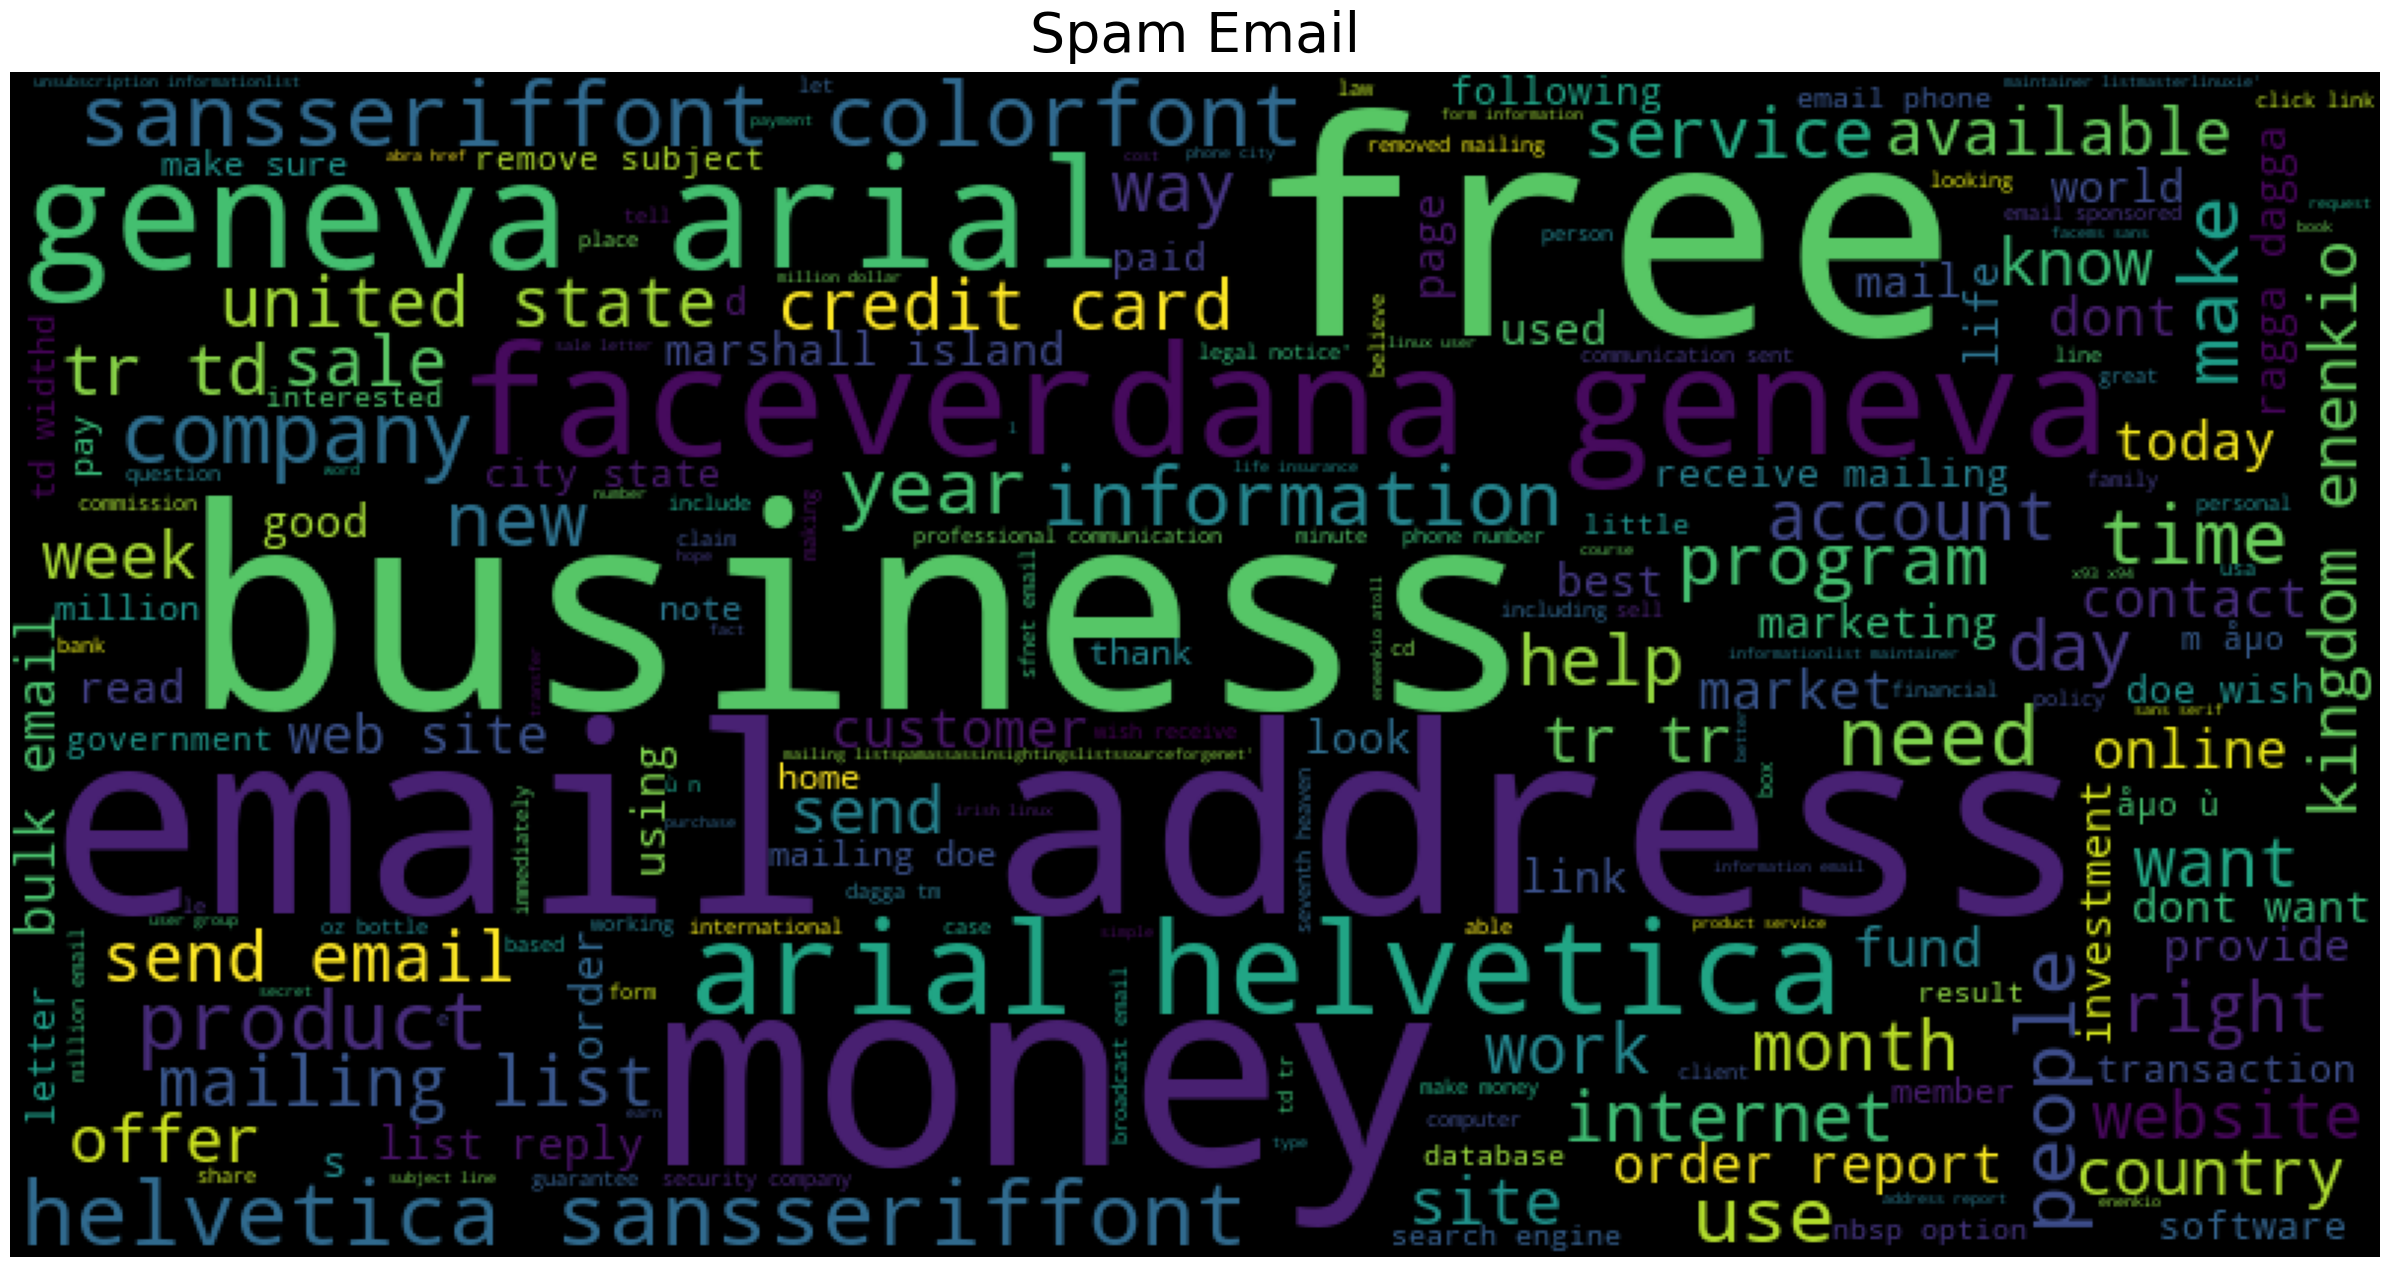

In [309]:
plot_wordcloud(spam_email,title = 'Spam Email')

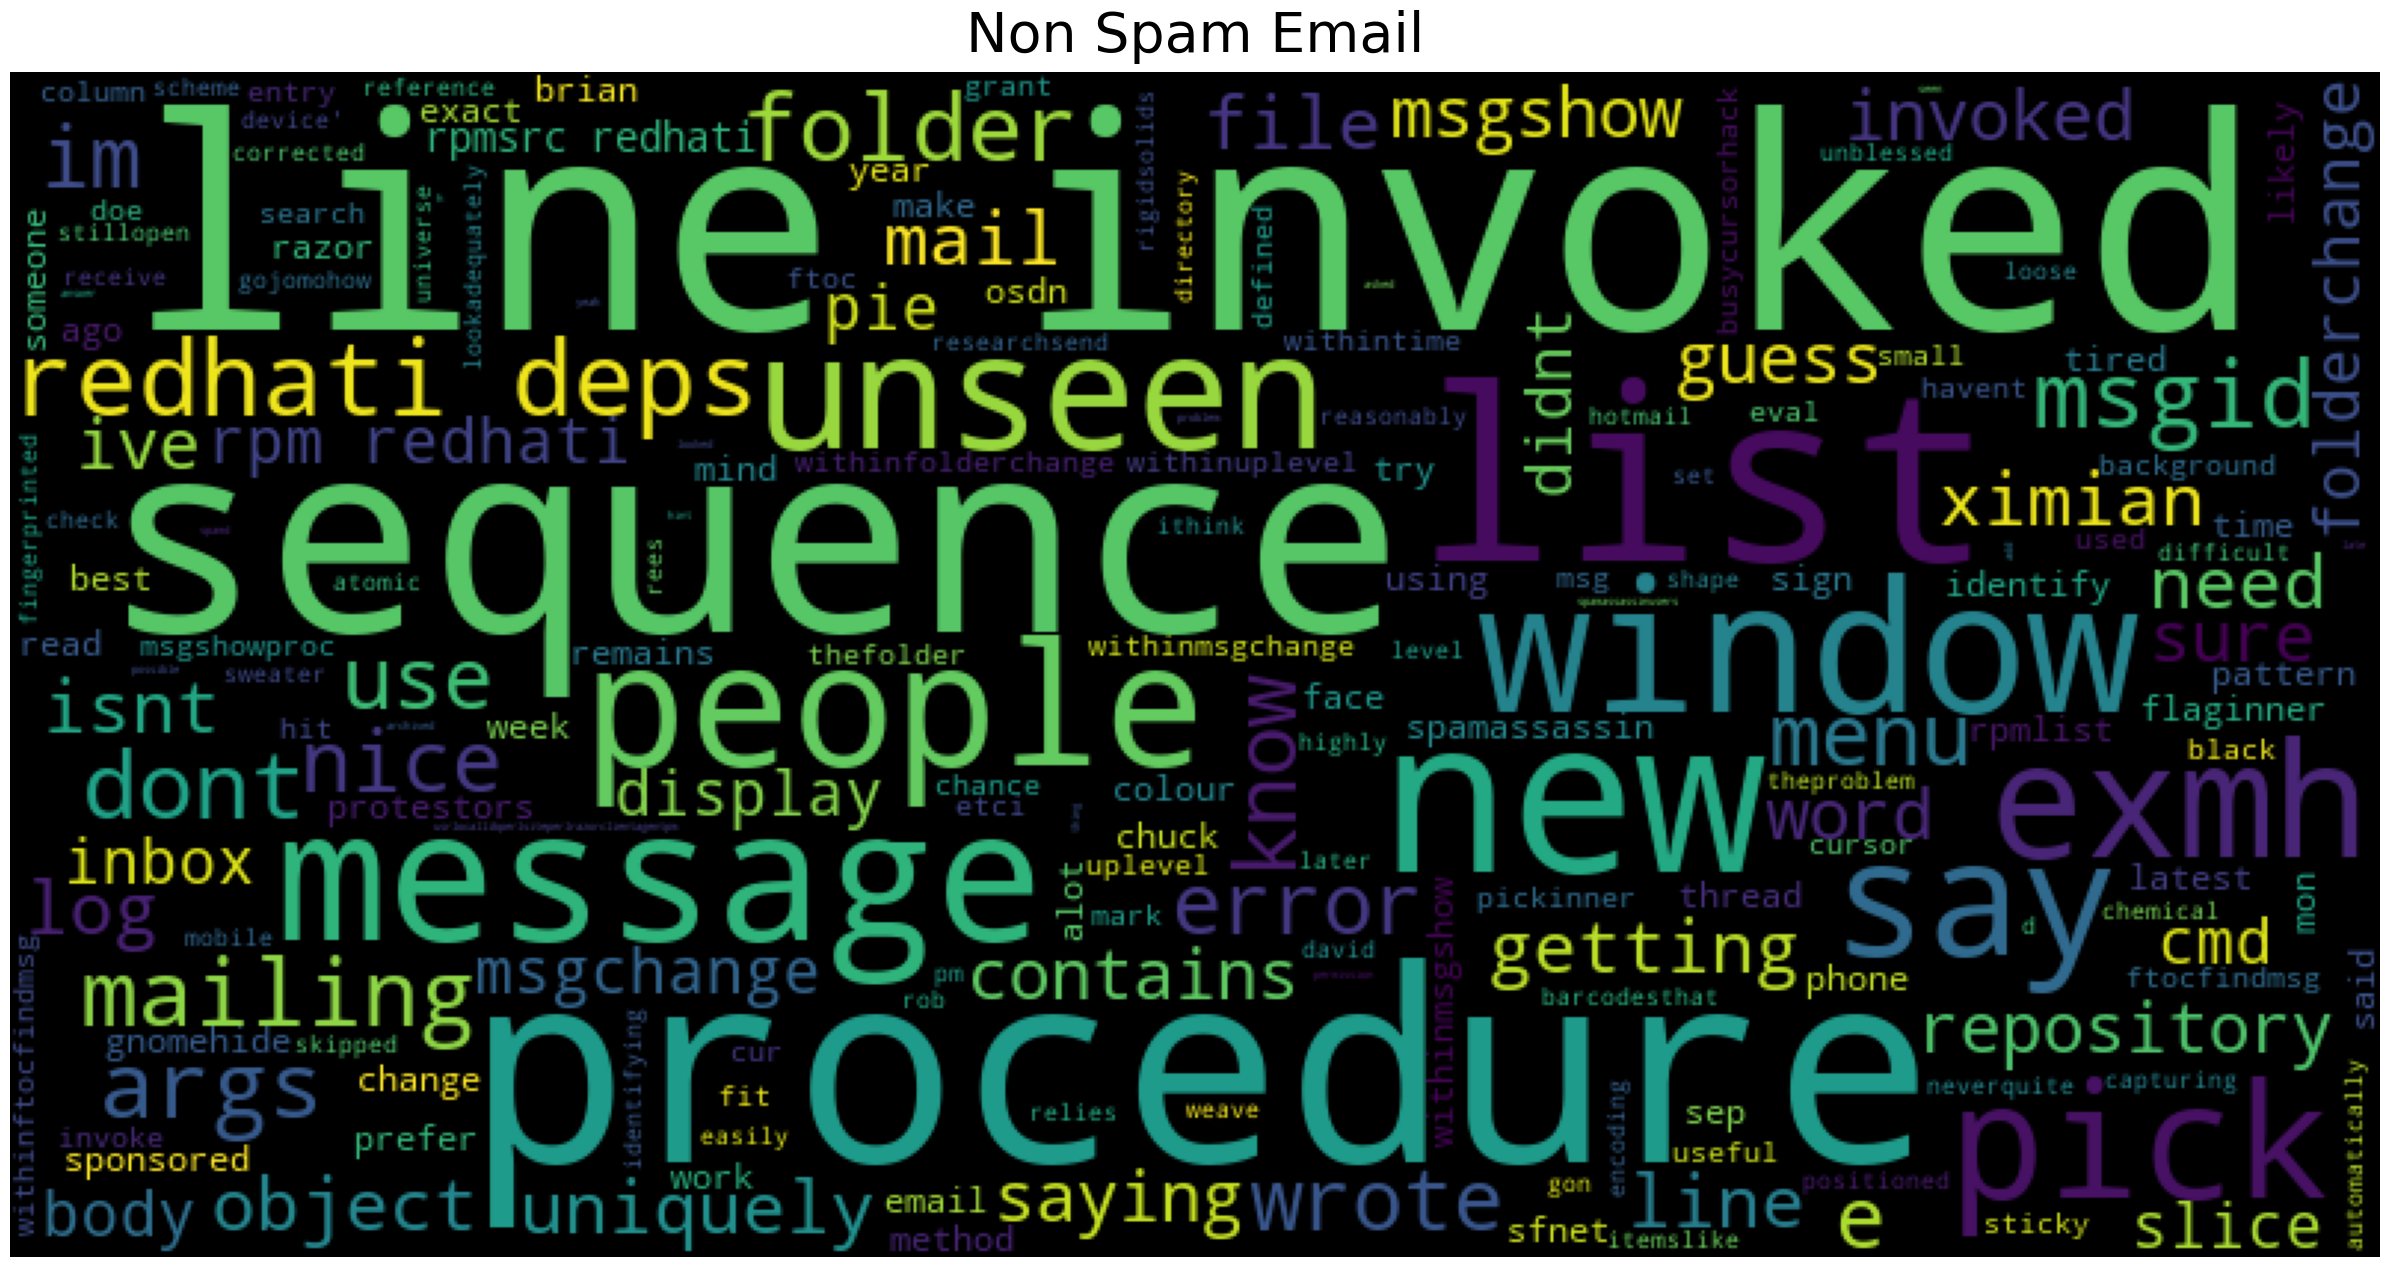

In [310]:
plot_wordcloud(non_spam_email,title="Non Spam Email")

# Visualizing using bar chart

In [311]:
from plotly.subplots import make_subplots
import IPython
import pandas as pd
import plotly.graph_objs as go
from collections import defaultdict
import plotly.offline as py

def configure_plotly_browser_state():
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
    '''))

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

def visualize_in_bar_chart(word_count=1):
    ## Get the bar chart from sincere questions ##
    freq_dict = defaultdict(int)
    for sent in non_spam_email:
        for word in generate_ngrams(sent, word_count):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace0 = horizontal_bar_chart(fd_sorted.head(20), 'orange')

    ## Get the bar chart from insincere questions ##
    freq_dict = defaultdict(int)
    for sent in spam_email:
        for word in generate_ngrams(sent, word_count):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace1 = horizontal_bar_chart(fd_sorted.head(20), 'orange')

    # Creating two subplots
    fig = make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                        subplot_titles=["Frequent words of non spam email",
                                        "Frequent words of spam email"])
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace1, 1, 2)
    fig['layout'].update(height=600, width=800, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')
    configure_plotly_browser_state()

visualize_in_bar_chart(2)


## Target Distribution

In [312]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [313]:
spam_train_index = [i for i,o in enumerate(y_train) if o == 1]
non_spam_train_index = [i for i,o in enumerate(y_train) if o == 0]

In [314]:
configure_plotly_browser_state()

spam_size = len(spam_train_index)
non_spam_size = len(non_spam_train_index)
total_train_size = spam_size + non_spam_size

trace = go.Bar(
    x=["Spam","Non Spam"],
    y=[spam_size, non_spam_size],
    marker=dict(
        color=[spam_size, non_spam_size],
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count for Train Data',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(["Spam", "Non Spam"]))
sizes = (np.array(([spam_size,non_spam_size]))/total_train_size*100)

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Train Data distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

In [315]:
configure_plotly_browser_state()

spam_test_index = [i for i,o in enumerate(y_test) if o == 1]
non_spam_test_index = [i for i,o in enumerate(y_test) if o == 0]

spam_size = len(spam_test_index)
non_spam_size = len(non_spam_test_index)
total_test_size = spam_size + non_spam_size

trace = go.Bar(
    x=["Spam","Non Spam"],
    y=[spam_size, non_spam_size],
    marker=dict(
        color=[spam_size, non_spam_size],
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count for Test Data',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(["Spam", "Non Spam"]))
sizes = (np.array(([spam_size,non_spam_size]))/total_train_size*100)

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Test Data Distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

# Feature Extraction

Using either TfidVectorizer of CountVectorizer

## TfidVectorizer

In [316]:
x_train = [o.split(" ") for o in x_train]
x_test = [o.split(" ") for o in x_test]

In [317]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [318]:
vectorizer = TfidfVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

TfidfVectorizer()

In [319]:
def convert_to_feature(raw_tokenize_data):
    raw_sentences = [' '.join(o) for o in raw_tokenize_data]
    return vectorizer.transform(raw_sentences)

In [320]:
x_train_features = convert_to_feature(x_train)
x_test_features = convert_to_feature(x_test)

## CountVectorizer

In [321]:
from sklearn.feature_extraction.text import CountVectorizer

In [322]:
vectorizer = CountVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

CountVectorizer()

In [323]:
x_train_features = convert_to_feature(x_train)
x_test_features = convert_to_feature(x_test)

## Training classifiers

## Gaussian NB

In [324]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [325]:
clf = GaussianNB()

In [326]:
batch_size = 1000
for i in range(0, len(x_train), batch_size):
    x_batch = x_train_features[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    clf.fit(x_batch.toarray(), y_batch)


In [327]:
# Compute the scores on the training data
train_score = clf.score(x_test_features.toarray(), y_test)
print("NB accuracy:", train_score)

NB accuracy: 0.820079522862823


In [328]:
# batch_size = 1000
# for i in range(0, len(x_train), batch_size):
#     x_batch = x_train_features[i:i + batch_size]
#     y_batch = y_train[i:i + batch_size]
#     clf.fit(x_batch.toarray(), y_batch)
#     clf.score(x_test_features.toarray(), y_test)

# Compute the scores on the training data
# train_score = clf.score(x_train_features.toarray(), y_train)
# print("Training Score:", train_score)

## SVM

In [329]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Creating a LinearSVC classifier with increased max_iter
svm_classifier = LinearSVC(max_iter=10000)  
svm_classifier.fit(x_train_features, y_train)
svm_predictions = svm_classifier.predict(x_test_features)
accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.9582504970178927


## Error Analysis

### Gaussian NB

In [330]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

y_predict = clf.predict(x_test_features.toarray())
conf_matrix = confusion_matrix(y_test, y_predict)
tn, fp, fn, tp = conf_matrix.ravel()

precision = 100 * precision_score(y_test, y_predict)
recall = 100 * recall_score(y_test, y_predict)

print("NB Confusion Matrix:")
print(conf_matrix)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)
print("Precision: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))

NB Confusion Matrix:
[[801   3]
 [178  24]]
True Negatives: 801
False Positives: 3
False Negatives: 178
True Positives: 24
Precision: 88.89%
Recall: 11.88%


### Plot NB confusion matrix

In [331]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [332]:
conf_matrix = confusion_matrix(y_test,y_predict)

In [333]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[801   3]
 [178  24]]


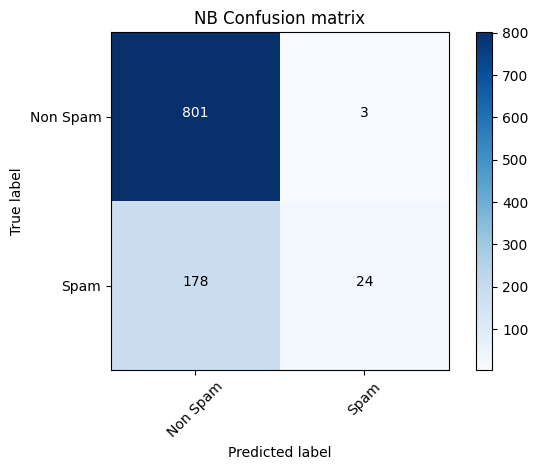

In [334]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='NB Confusion matrix')

## SVM ERROR ANALYSIS

In [335]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

svm_predictions = svm_classifier.predict(x_test_features)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_tn, svm_fp, svm_fn, svm_tp = svm_conf_matrix.ravel()

svm_precision = 100 * precision_score(y_test, svm_predictions)
svm_recall = 100 * recall_score(y_test, svm_predictions)

print("SVM Confusion Matrix:")
print(svm_conf_matrix)
print("SVM True Negatives:", svm_tn)
print("SVM False Positives:", svm_fp)
print("SVM False Negatives:", svm_fn)
print("SVM True Positives:", svm_tp)
print("SVM Precision: {:.2f}%".format(svm_precision))
print("SVM Recall: {:.2f}%".format(svm_recall))

SVM Confusion Matrix:
[[783  21]
 [ 21 181]]
SVM True Negatives: 783
SVM False Positives: 21
SVM False Negatives: 21
SVM True Positives: 181
SVM Precision: 89.60%
SVM Recall: 89.60%


##  SVM CONFUSION MATRIX

Confusion matrix, without normalization
[[783  21]
 [ 21 181]]


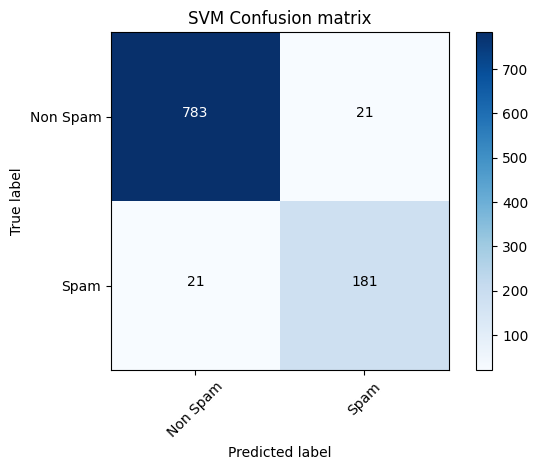

In [337]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_conf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='SVM Confusion matrix')